In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


ruta = "C:/Users/QoMH/Pruebas_de_nuevos_modelos/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

,title,abstract,categorical,categoria,cat_one_hot,abstract_limpio,abstract_preprocesado
0,Electromagnetic neutrinos in laboratory experi...,An overview of neutrino electromagnetic proper...,astrophysics,humano,"[1, 0, 0, 0, 0]",An overview of neutrino electromagnetic proper...,"['overview', 'neutrino', 'electromagnetic', 'p..."
1,Infrared complex refractive index of astrophys...,In dense and cold regions of the interstellar ...,astrophysics,humano,"[1, 0, 0, 0, 0]",In dense and cold regions of the interstellar ...,"['dense', 'cold', 'region', 'interstellar', 'm..."
2,Gamma-ray lines in modern astrophysics,Gamma-ray astronomy provides a direct window i...,astrophysics,humano,"[1, 0, 0, 0, 0]",Gamma-ray astronomy provides a direct window i...,"['gamma-ray', 'astronomy', 'provides', 'direct..."
3,From Coulomb excitation cross sections to non-...,Coulomb and nuclear dissociation of $^{17}$Ne ...,astrophysics,humano,"[1, 0, 0, 0, 0]",Coulomb and nuclear dissociation of $^{17}$Ne ...,"['coulomb', 'nuclear', 'dissociation', 'ne', '..."
4,Astrophysical Black Holes: A Compact Pedagogic...,Black holes are among the most extreme objects...,astrophysics,humano,"[1, 0, 0, 0, 0]",Black holes are among the most extreme objects...,"['black', 'hole', 'among', 'extreme', 'object'..."
...,...,...,...,...,...,...,...
7745,Superconducting LaAlO3/SrTiO3 Nanowires,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe've achieved a groundbreaking breakthrou...,"[""'ve"", 'achieved', 'groundbreaking', 'breakth..."
7746,Coupling a single Nitrogen-Vacancy center to a...,Here's a rewritten version of the text in my o...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe propose a groundbreaking idea: connecti...,"['propose', 'groundbreaking', 'idea', 'connect..."
7747,Superconducting and Anti-Ferromagnetic Phases ...,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nThis study establishes a connection betwee...,"['study', 'establishes', 'connection', 'two', ..."
7748,New Superconductivity Dome in LaFeAsO$_{1-x}$F...,Here's the rewritten text:\n\nA fascinating ph...,superconductivity,llama3,"[0, 0, 0, 0, 1]",Here's the rewritten text:\n\nA fascinating ph...,"[""'s"", 'rewritten', 'text', 'fascinating', 'ph..."


In [2]:
texto_preprocesado = datos['abstract_preprocesado'].tolist()
lista_de_listas = [eval(cadena) for cadena in texto_preprocesado]

print(len(lista_de_listas))
print(type(lista_de_listas[0]))

7750
<class 'list'>


In [44]:
#ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_TFIDF_matrix/tfidf_matrix.csv"
ruta = "C:/Users/QoMH/Pruebas_de_nuevos_modelos/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_TFIDF_matrix/tfidf_matrix.csv"
tf_idf_matrix = pd.read_csv(ruta)


In [45]:
tf_idf_matrix.shape

(7750, 19028)

In [46]:
n_components = 2 

In [47]:
etiquetas = tf_idf_matrix.iloc[:,-1]
tf_idf = tf_idf_matrix.iloc[:,:-1]
tf_idf.shape

(7750, 19027)

In [48]:
pca = PCA(n_components=n_components)
pca_matrix = pca.fit_transform(tf_idf)

In [49]:
pca_matrix

array([[-0.13767389,  0.16457343],
       [-0.07675405,  0.00072526],
       [-0.10340033,  0.0468533 ],
       ...,
       [ 0.09518364, -0.01005359],
       [-0.09127507, -0.17177182],
       [-0.01895028, -0.08183891]])

7750


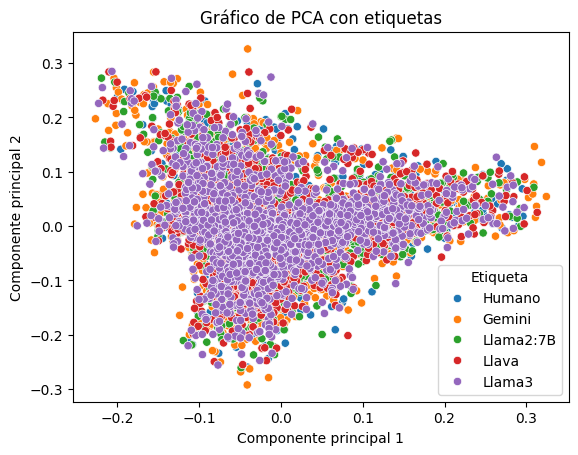

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_values = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente
nuevas_etiquetas = []
for et in etiquetas:
    if et == "[1, 0, 0, 0, 0]":
        nuevas_etiquetas.append("Humano")
    elif et == "[0, 1, 0, 0, 0]":
        nuevas_etiquetas.append("Gemini")
    elif et == "[0, 0, 1, 0, 0]":
        nuevas_etiquetas.append("Llama2:7B")
    elif et == "[0, 0, 0, 1, 0]":
        nuevas_etiquetas.append("Llava")
    elif et == "[0, 0, 0, 0, 1]":
        nuevas_etiquetas.append("Llama3")

print(len(nuevas_etiquetas))
        
# Crear un DataFrame con los valores PCA y las etiquetas
df = pd.DataFrame({'PC1': pca_values[:, 0], 'PC2': pca_values[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores PCA con seaborn
sns.scatterplot(x='PC1', y='PC2', hue='Etiqueta', data=df)
plt.title('Gráfico de PCA con etiquetas')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
# Guardar el gráfico como PNG
plt.savefig('C:/Users/QoMH/Pruebas_de_nuevos_modelos/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Experimentos_con_modelos_basicos/PCA_Y_TSNE_TF_IDF/PCA_TFIDF.png')
plt.show()

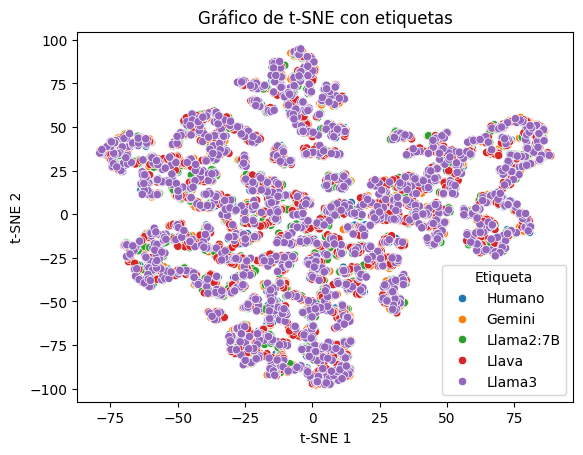

In [62]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tus datos están en la variable datos y las etiquetas en etiquetas
datos = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
datos_tsne = tsne.fit_transform(datos)

# Crear un DataFrame con los valores t-SNE y las etiquetas
df = pd.DataFrame({'TSNE1': datos_tsne[:, 0], 'TSNE2': datos_tsne[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores t-SNE con seaborn
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Etiqueta', data=df)
plt.title('Gráfico de t-SNE con etiquetas')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.savefig('C:/Users/QoMH/Pruebas_de_nuevos_modelos/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Experimentos_con_modelos_basicos/PCA_Y_TSNE_TF_IDF/t_SNE_TFIDF.png')
plt.show()